## SARIMA


In [1]:
# Libraries
#

import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import adfuller, pacf, pacf_ols


import matplotlib.pyplot as plt
plt.style.use('ggplot') 
from pandas.plotting import lag_plot

In [2]:
# Establish valid data file path, for reading and saving eg CSV files
#

import os
data_directory = 'Data_Sources'          # Designated data folder above the current working directory
project_directory = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(project_directory, data_directory)
if not os.path.isdir(DATA_PATH):
    raise Exception(f'Directory not found: {DATA_PATH}')

del data_directory, project_directory

In [3]:
# Load the time series CSV

# Load the states .csv file, exit if do not exist or are invalid
file_name = 'hotel_timeseries.csv'
file_path = os.path.join(DATA_PATH, file_name)
if not os.path.isfile(file_path):
    raise Exception(f'File not found: {file_path}')
hotel_time_series_df = pd.read_csv(file_path, parse_dates=['Date'])
hotel_time_series_df.set_index('Date', inplace=True)

# Tidy Up
del file_name, file_path

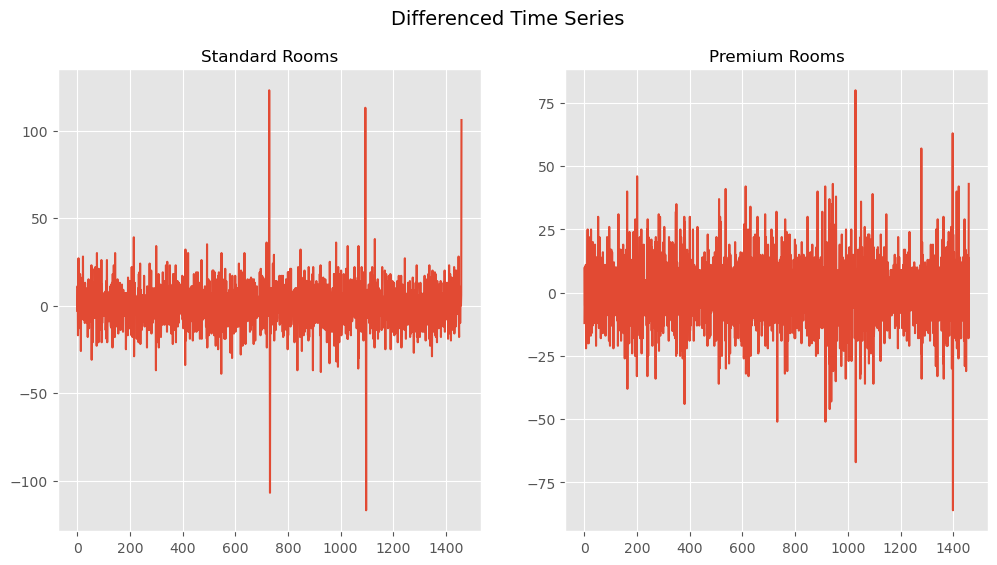

In [4]:
# Perform differencing to make stationary

differenced_series_std = np.diff(hotel_time_series_df['Standard_OCC'])
differenced_series_prm = np.diff(hotel_time_series_df['Premium_OCC'])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Differenced Time Series', fontsize=14)

ax1.set_title('Standard Rooms', fontsize=12)
ax1.plot(differenced_series_std)
ax2.set_title('Premium Rooms', fontsize=12)
ax2.plot(differenced_series_prm)

In [5]:
# Plot PACF & get order of p

#pacf_result = pacf(differenced_series_std, method='ols', nlags=10)